# Distant Reading, переходим к Python

## Как использовать этот код 

### (можно пропустить эту часть, если вы знаете, что такое Jupyter и ipynb-тетрадки -- в таком случае переходите сразу к "Начало работы")
То, на что вы сейчас смотрите — тетрадка Jupyter Notebook. Это одна из популярных сред для написания и __демонстрации__ кода на Python (и не только). Jupyter запускает питоновский код прямо в браузере (но локально, т.е. код исполняет ваш компьютер, в отличие от, например Google Colab). В Jupyter код можно запускать не целиком, а по ячейкам (в отличие от IDLE). 

Пример:

In [1]:
# ячейка с кодом
text = 'Мы с Даней сегодня пробуем в дистант ридинг'
print (text)

Мы с Даней сегодня пробуем в дистант ридинг


In [2]:
# еще одна ячейка с кодом. 
# Пространство имен общее — переменная text была заполнена в предыдущей ячейке
print (text.upper())

МЫ С ДАНЕЙ СЕГОДНЯ ПРОБУЕМ В ДИСТАНТ РИДИНГ


Такой последовательный режим запуска кусочков кода особенно удобен в преподавании. Поэтому, например, Яндекс делает многие курсы в ipynb ([типа такого](https://github.com/yandexdataschool/nlp_course/tree/master)) 


Кроме того, ячейки бывают текстовыми — их можно форматировать с помощью формата разметки markdown (.md). Текст, который вы сейчас читаете, а также всякие описания и картинки в предыдущей части этого занятия, написаны как раз в таком формате. Файлы Jupyter Notebook имеют расширение .ipynb и автоматически рендерятся гитхабом. Например, вот эта __[тетрадка](first_dr_notebook_danya.ipynb)__  у меня на гитхабе.  

## Окей, а как я могу запустить код в таком .ipynb?

Есть разные варианты: 

### Через __[Google Colab](https://colab.research.google.com)__. 

Google Colab — это гугловский инструмент для написания кода в браузере и запуска прямо на серверах Google (с возможностью бесплатно использовать их вычислительные мощности, в т.ч. графические процессор  — GPU).  Google Colab — родственник Jupyter, они очень похожи. Разница в том, что Jupyter работает локально и использует ваш собственный питон, а Google Colab — это облачный сервис, похожий на Google Docs: вы можете делиться тетрадками и т.д. В Colab можно открыть эту тетрадку, указав ссылку на нее: 

![Colab](pics/git2colab_new.png) 

Просто загрузить .ipynb-файл в Colab тоже можно. 

### Скачать себе .ipynb и открыть в Jupyter

Скачать .ipynb с гитхаба: 

![Raw](pics/raw_download.png) 

Поставить Jupyter Notebook по инструкции __[отсюда](https://jupyter.readthedocs.io/en/latest/install.html)__. Открыть терминал (в Windows — командную строку).пойти в папку, внутри которой лежит скачанный .ipynb, написать там jupyter notebook. После этого у вас должно открыться в браузере что-то такое:

![Colab](pics/jupyter.png)

Тыкайте на тетрадку -- и все, можно работать в ней, писать код и т.п. Из Jupyter можно выгрузить и отдельно код в виде файла .py (но тогда разделение на ячейки пропадет).

### Клонировать репозиторий

Чуть более продвинутся версия предыдущего варианта. Делаете

git clone https://github.com/dhhse/dhcourse

И у вас есть этот код, а к тому же и все тексты рядом с ним (в папке texts лежит наш корпус в лемматизированном виде). **Правда, скачиывание через небыстрый интернет может занять сколько-то времени**.

### Скачать .ipynb и открыть в PyCharm
Если вы любите популярную у питонистов IDE PyCharm  -- она умеет открывать ipynb. Но для этого все равно нужен установеленный Jupyter. Поэтому надо проделать все то же, что в предыд.пункте, а потом открыть файл в PyCharm.

### Скачать файл .py из Google Colab или Jupyter и открыть любой IDE (IDLE, PyCharm, что угодно...)
Из Colab после создания копии вы можете выгрузить не весь .ipynb, а только код в .py. Этот код уже можно запускать где угодно, хоть из командной строки (терминала) вашего компьютера. Но тогда разделение на ячейки опять-таки пропадет.

## Начало работы

### Самый простой пример: работаем в Python с одиночным текстом

NB: в ячейке ниже НЕ питоновский код, команда ls — стандартная команда для терминала/командной строки ("показать содержимое папки"), выполненная через Jupyter (чтобы сказать юпитеру, что команду нужно послать в командную строку, а не в питон, надо поставить воскл.знак перед командой); [подробнее тут](https://habr.com/ru/company/wunderfund/blog/316826/)

In [ ]:
# у себя в репозитории я положил рядом с кодом пример текста — Преступление и наказение Ф.М. Достоевского
# вот так я проверю, что рядом в папке лежит файл с корпусом 
!ls

In [ ]:
# У тех, кто открыл тетрадку в Google Colab, файла не будет. 
# В случае, когда нам нужен всего один файл, это можно решить простым способом: вы сами загрузите файл в колаб 
# Вот стандартный питоновский код для загрузки файлов в колаб
# Если работаете в Jupyter — запускать не нужно
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

 __[На всякий случай: прямая ссылка на текстовый файл](https://github.com/dhhse/dhcourse/blob/master/dr_practice/Dostoevsky_PrestuplenieINakazanie.txt)__

In [5]:
# откроем файл в питоне
path_to_file = 'Dostoevsky_PrestuplenieINakazanie.txt'
prest_i_nak = open (path_to_file, 'r')
prest_i_nak_kak_stroka = prest_i_nak.read()

In [ ]:
## попробуйте вывести тут длину строки с помощью функции len; надо написать len (prest_i_nak_kak_stroka) -- так вы передадите в функцию len ваш текст, считанный в сторку 

In [ ]:
## попробуйте получить срез из первых 100 символов вашей строки с помощью срезов списка [:]
## т.е. напишите ниже вот это: prest_i_nak_kak_stroka [:100]
## и нажмите выполнить

# Сегментация текста

## 0. Простейший способ сегментации строки на токены (как бы на слова, но тупее грубее) — питоновский встроенный метод .split:

Его вы уже видели на парах с Борисом Валерьевичем.

In [8]:
prest_i_nak_kak_spisok_slov = prest_i_nak_kak_stroka.split() ## здесь в качестве аргумента можно воткнуть разделитель; по умолчанию это любое количество пробелов
print ('Примерное количество слов в "Преступлении и наказании":', len (prest_i_nak_kak_spisok_slov))

Примерное количество слов в "Преступлении и наказании": 176283


In [ ]:
# посмотрим на этот список
prest_i_nak_kak_spisok_slov[:200]

### попробуем получить список уникальных слов:

In [10]:
prest_i_nak_kak_mnojestvo_slov = set(prest_i_nak_kak_spisok_slov) ## превратим список в множество
len (prest_i_nak_kak_mnojestvo_slov) ## получим число уникальных слов

41063

In [ ]:
prest_i_nak_kak_spisok_unikalnyh_slov = list (prest_i_nak_kak_mnojestvo_slov)
(prest_i_nak_kak_spisok_unikalnyh_slov).sort()
prest_i_nak_kak_spisok_unikalnyh_slov [:1000]

## 1. Более умный способ: сегментируем текст регекспом

In [31]:
## питоновский модуль для регекспов
## ВООБЩЕ-ТО так делать НЕХОРОШО, потому что в тетрадках положено все импорты пихать в самую верхнюю ячейку
## но я считаю, что здесь в педагогических целях можно
import re

In [17]:
prest_i_nak_spisok_re =  re.split (' +|[.,!?–]|\n',prest_i_nak_kak_stroka)

In [ ]:
prest_i_nak_spisok_re [:100]

## 2. Еще более умный способ: сегментируем текст готовым токенизатором — возьмем его из прекрасной библиотеки для обработки языка NLTK 

Кстати, [приглядитесь к NLTK](https://www.nltk.org/), там много полезного и хорошая [книжка](https://www.nltk.org/book/)

In [ ]:
# если у вас еще нет nltk, установите его:
!pip install nltk

In [3]:
from nltk.tokenize import word_tokenize

In [ ]:
prest_i_nak_nltk_tokenized = word_tokenize (prest_i_nak_kak_stroka)
prest_i_nak_nltk_tokenized [:100]

### А теперь давайте посчитаем частотность слов в нашем списке слов; т.е. собственно как часто повторяется каждое

In [36]:
## для этого мы тоже не станем писать свое решение с нуля, а воспользуемся готовым от NLTK
## возьемем токенизированный список — и засунем его в функцию FreqDist от NLTK
from nltk import FreqDist
word_freqs_prest_i_nak = FreqDist(prest_i_nak_nltk_tokenized)
word_freqs_prest_i_nak.most_common (100)

[(',', 25337),
 ('.', 8198),
 ('и', 8021),
 ('--', 6073),
 ('не', 3533),
 ('в', 3515),
 ('!', 3265),
 ('что', 3010),
 ('на', 2304),
 ('?', 2245),
 ('он', 2166),
 ('...', 2097),
 ('с', 1927),
 ('я', 1805),
 ('как', 1496),
 (';', 1271),
 ('его', 1170),
 ('же', 1130),
 ('а', 1103),
 ('это', 1099),
 ('так', 1025),
 (':', 940),
 ('всё', 871),
 ('к', 868),
 ('бы', 865),
 ('но', 808),
 ('вы', 805),
 ('было', 772),
 ('``', 741),
 ("''", 739),
 ('она', 700),
 ('Он', 686),
 ('А', 672),
 ('еще', 664),
 ('то', 657),
 ('даже', 641),
 ('у', 620),
 ('по', 619),
 ('за', 611),
 ('ее', 611),
 ('Я', 590),
 ('только', 580),
 ('Раскольников', 565),
 ('Да', 537),
 ('теперь', 530),
 ('да', 518),
 ('уже', 518),
 ('меня', 517),
 ('вдруг', 514),
 ('ты', 507),
 ('от', 487),
 ('ему', 466),
 ('быть', 455),
 ('уж', 446),
 ('из', 445),
 ('мне', 438),
 ('И', 430),
 ('был', 421),
 ('вот', 406),
 ('до', 402),
 ('вам', 395),
 ('о', 382),
 ('себя', 375),
 ('вас', 373),
 ('ведь', 370),
 ('ли', 368),
 ('него', 365),
 ('оче

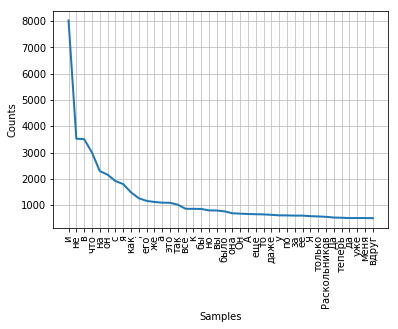

In [96]:
word_freqs_prest_i_nak.plot(40, cumulative=False)

# Нормализация текста на уровне словоизменения: стемминг, лемматизация, морфологический анализ

Пока мы делали статистику только по формам слов (словоформам). Т.е. "конь" и "конями" у нас считались совершенно разными словами. 

Самый простой способ нормализации слов в языках с морфологией — стемминг. Стемминг — это очень грубое разбиение формы на предполагаемую основу и предполагаемую флексию. Программы-стеммеры умеют превращать фразу "Vyshka's students coded" в "Vyshka student code", 'Маша поехала за грибами' в 'Маш поехал за гриб', а 'Даня работает в Вышке' в "Дан работ в Вышк"

### В том же NLTK есть готовая реализация стеммера для русского языка. Давайте потестируем ее!

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [ ]:
## стеммер не быстрый, поэтому давайте возьмем первые 1000 слов, а не все
first_1000 = prest_i_nak_nltk_tokenized[:1000]
## этот стеммер не умеет сам токенизировать -- он работает только с отдельными словами. 
## Поэтому придется скармливать ему наш список по одному: 
prest_i_nak_first_1000_stemmed = []
for word in first_1000:
    prest_i_nak_first_1000_stemmed.append (stemmer.stem(word))

In [ ]:
prest_i_nak_first_1000_stemmed

In [ ]:
## Но вообще стеммеры обычно применяются для английского с его небогатой морфологией и частым тождеством 
## голой основы -- и нач.формы
## Английский пример.
en_stemmer = SnowballStemmer("english")
string = 'I love teaching students at HSE'
tostem = string.split()
for word in tostem:
    print (en_stemmer.stem(word))

# Лемматизация текста

Лемматизация — более традиционный для русского языка вариант, когда слова привожятся к начальной (словарной) форме. Т.е.  "Даня работает в Вышке" превращается в "Даня работать в Вышка". После такого преобразования мы можем (с оговорками, конечно) считать статистику для слов целиком, а не только для отдельных словоформ.

### MyStem

__[Mystem](https://tech.yandex.ru/mystem/)__ - это свободно распространяемый морфологический анализатор для русского языка с закрытым исходным кодом. То есть мы можем его бесплатно скачать с сайта и пользоваться им, но не можем посмотреть, что у него внутри и как оно работает.

Mystem был придуман одним из создателей Яндекса Ильёй Сегаловичем. Некоторый потомок Mystem'а до сих пор работает внутри большого поисковика Яндекса, анализируя слова при поиске.

MyStem значит my stemmer. Как мы с вами уже знаем (см. выше), стемминг -- это разбиение формы на основу и флексию. Программы-стеммеры умеют превращать фразу 'Маша поехала за грибами' в 'Маш поехал за гриб'. **Но на самом деле MyStem не стеммер, а полноценный морфологический АНАЛИЗАТОР**. Он может гораздо больше: устанавливать словарную форму слова, определять часть речи и грамматические характеристики (падеж, число, время, род...). В последних версиях Mystem умеет и выбирать из нескольких возможных грамматических разборов один, наиболее верный.

У Mystem нет графического оконного интерфейса, запустить его можно только из командной строки. Зато есть обертка для Python — pymystem3. Правда, с ней все работает тяжело — иногда лучше запускать из командной строки. И обертка pymystem3 очень плохо дружит с колабом. 

__[Документация к MyStem](https://tech.yandex.ru/mystem/doc/index-docpage/)__

### Запускаем MyStem (для тех, кто запускает НЕ в Колабе):
#### (А что с колабом? Ответ [тут](#colab_trouble))

In [ ]:
# эта клетка нужна вам, если у вас не установлен модуль pymystem3.
!pip install pymystem3
## (NB: это снова не питон, а команда для командной строки)

In [27]:
## В pymystem3 есть класс MyStem -- это как бы готовый анализатор MyStem, упакованный в питоновский класс 
## импортируем непосредственно класс "анализатор MyStem" из pymystem3
from pymystem3 import Mystem

In [ ]:
help (Mystem()) ## всегда полезно почитать хелпы!

In [28]:
moi_analizator = Mystem() ## создаем экземпляр класса "анализатор MyStem" 
test = 'Даня тестирует машинную морфологию' ## создаем тестовую строку
lemmatized = moi_analizator.lemmatize(test) ## лемматизируем строку с помощью mystem 
print (lemmatized) ## напечатаем лемматизированную строку

['даня', ' ', 'тестировать', ' ', 'машинный', ' ', 'морфология', '\n']


In [33]:
clean_prest_i_nak_kak_stroka = re.sub ('[.,?!-:]', '', prest_i_nak_kak_stroka)

In [34]:
prest_i_nak_by_mystem = moi_analizator.lemmatize(clean_prest_i_nak_kak_stroka) ## лемматизируем преступление и наказание с помощью mystem 
#print  (prest_i_nak_kak_by_mystem)

In [ ]:
word_freqs_prest_i_nak = FreqDist(word for word in prest_i_nak_by_mystem if re.search ('[, !;:\n]', word) == None)
word_freqs_prest_i_nak.most_common (100)

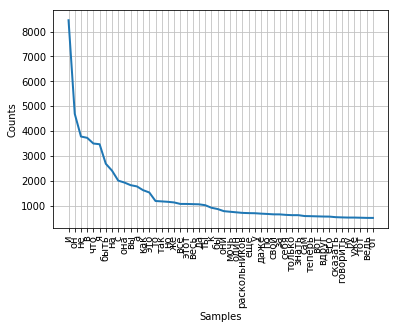

In [31]:
word_freqs_prest_i_nak.plot (50, cumulative=False)

### Собственно морфологический анализ

Как я уже сказал, mystem -- полноценный анализатор, умеет сказать, в каком роде-числе-падеже-времени слово и т.п. Для этого используется второй метод — analyze. 

In [ ]:
analyzed = moi_analizator.analyze(test) ## лемматизируем строку с помощью mystem 
print (analyzed) ## напечатаем лемматизированную строку

### Есть и альтернативные способ работать с mystem, не используя обертку pymystem3

Во-первых, вы можете просто [скачать mystem](https://yandex.ru/dev/mystem/) (исполняемый файл) и запускать его из терминала / командной строки вообще без какого-либо питона. Вот пример:

![mystem_terminal.png](pics/mystem_terminal.png)

Во-вторых, можно из питона ходить в командную строку с помощью встроенной библиотеки os и запускать майстем  (не очень элегантно получается, но зато гораздо быстрее работает):

In [ ]:
import os

## скажите питону, где у вас MyStem
path_to_mystem_on_my_machine = "folder_with_mystem/mystem"
os.system(path_to_mystem_on_my_machine + ' -lnd ' + path_to_file + ' Lemmatized' + path_to_file)

In [32]:
## А в jupyter, как вы уже м.б. помните, можно еще и обращаться к командной строке с помощью  !

! folder_with_mystem/mystem -lnd 'Dostoevsky_PrestuplenieINakazanie.txt' 'LemmDostoevsky_PrestuplenieINakazanie.txt'

<a id='colab_trouble'></a>
## К сожалению, ни один из описанных способов запуска MyStem (при всем их многообразии) нельзя легко воспроизвести в Колабе.

* Стандартный pymystem3 там не работает (говорят, работает, если поставить версию 0.10.10 (т.е. вместо !pip install pymystem3 сделать !pip install pymystem3==0.1.10) и перезапустить тетрадку, но у меня все равно не сработало) 
* загрузить туда исполняемый файл mystem и запустить его мне не удалось
* можно попробовать загрузить архив и распаковать, но не факт, что сработает

# Для тех кто работает как в Колабе, так и не в Колабе

## pymorphy2

pymorphy2 - это не обертка, а целиком написанный на Python морфологический анализатор -- открытый и свободный. Он может делать то же, что и pymystem3, и даже больше: изменять слова в нужную форму (спрягать и склонять). При этом pymorphy2 справляется и с незнакомыми словами.

[документация](https://pymorphy2.readthedocs.io/en/latest/)

pymorphy2 обучался на словарях проекта OpenCorpora, что накладывается определённый отпечаток на его набор грамматических тегов (например, он не очень хорошо совместим с набором грамм.тегов Mystem). Более того, даже внутри себя pymorphy2 противоречив: теги анализа не совсем совпадают с тегами синтеза (т.е. теми, которые он умеет принимать, когда вы хотите поставить слово в нужную форму)

Для работы точно так же надо создать экземпляр класса анализатор, только теперь класс называется не `Mystem` a `MorphAnalyzer`. Рекомендуется создать один экземпляр и дальше с ним и работать, поскольку он занимает достаточно много памяти, и если создать несколько экземпляров анализаторов, то они будут тормозить программу.

In [ ]:
## Если не установлен pymorphy2
!pip install pymorphy2
## можете попробовать также быструю версию pip install pymorphy2[fast], но тут возможны проблемы 

In [9]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [10]:
morph.parse ('конями')

[Parse(word='конями', tag=OpencorporaTag('NOUN,anim,masc plur,ablt'), normal_form='конь', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'конями', 354, 10),))]

In [15]:
morph.parse ('мыло')

[Parse(word='мыло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='мыло', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'мыло', 54, 0),)),
 Parse(word='мыло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='мыло', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'мыло', 54, 3),)),
 Parse(word='мыло', tag=OpencorporaTag('VERB,impf,tran neut,sing,past,indc'), normal_form='мыть', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'мыло', 1813, 9),))]

In [12]:
## Важная для нас разница с MyStem — в том, что pymorphy не токенизирует строку автоматически. 
## Ему все-таки нужны уже токенизированные слова (так же, как мы делали выше со стеммером), а не целая строка, как умеет mystem

In [13]:
# Так не сработает, хотя результат интересный и кое-что дает 
test = 'Даня еще раз тестирует машинную морфологию'
morph.parse (test)

[Parse(word='даня еще раз тестирует машинную морфологию', tag=OpencorporaTag('NOUN,inan,femn sing,accs'), normal_form='даня еще раз тестирует машинную морфология', score=1.0, methods_stack=((<FakeDictionary>, 'даня еще раз тестирует машинную морфологию', 40, 3), (<KnownSuffixAnalyzer>, 'логию')))]

In [ ]:
# А вот так сработает
for word in test.split():
    print (morph.parse (word))

In [ ]:
Посмотрим, из чего состоит parse
help (pymorphy2.parse)

In [18]:
## напишем небольшой цикл для лемматизации каждого слова в списке токенов

my_tokens = test.split()
for word in my_tokens:
    rezultat = morph.parse(word)
    naibolee_veroyantniy = rezultat[0] ## почему мы берем первый разбор? 
    ## см.в этом месте: https://pymorphy2.readthedocs.io/en/latest/user/guide.html#select-correct
    nach_forma = naibolee_veroyantniy.normal_form
    print ('Начальная форма: ', nach_forma)

Начальная форма:  даня
Начальная форма:  ещё
Начальная форма:  раз
Начальная форма:  тестировать
Начальная форма:  машинный
Начальная форма:  морфология


## Задание: сделать лемматизацию "Преступления и наказания" с помощью PyMophy2 

1. напечатать 100 первых слов 
2. напечатать 100 самых частотных слов

### Вариант решения 1 (с использованием уже сделанной нами выше токенизации): 

Т.к. выше мы уже токенизировали текст (см. раздел "сегментация текста" выше) и сложили результат в виде списка слов в переменную prest_i_nak_nltk_tokenized, можно просто пройтись по словам в этом списке и применить к ним анализатор PyMorphy2

In [24]:
lemmatized_pres_i_nak = []
for word in prest_i_nak_nltk_tokenized:
    rezultat_analiza = morph.parse(word)
    naibolee_veroyantniy_razbor = rezultat_analiza[0] ## почему мы берем первый разбор? 
    ## см.в этом месте: https://pymorphy2.readthedocs.io/en/latest/user/guide.html#select-correct
    lemma = naibolee_veroyantniy_razbor.normal_form
    lemmatized_pres_i_nak.append(lemma)

Работает это, правда, долго, секунд 20-30 :( При случае можно попробовать pymorphy2 fast

In [25]:
print (lemmatized_pres_i_nak[:100])

['преступление', 'и', 'наказание', 'роман', 'в', 'шесть', 'часть', 'с', 'эпилог', 'часть', 'один', 'i', 'в', 'начало', 'июль', ',', 'в', 'чрезвычайно', 'жаркое', 'время', ',', 'под', 'вечер', ',', 'один', 'молодая', 'человек', 'выйти', 'из', 'свой', 'каморка', ',', 'который', 'нанимать', 'от', 'жильцов', 'в', 'с', '--', 'метр', 'переулок', ',', 'на', 'улица', 'и', 'медленно', ',', 'как', 'бы', 'в', 'нерешимость', ',', 'отправиться', 'к', 'к', '--', 'ну', 'мост', '.', 'он', 'благополучно', 'избегнуть', 'встреча', 'с', 'свой', 'хозяйка', 'на', 'лестница', '.', 'каморка', 'он', 'приходиться', 'под', 'сама', 'кровля', 'высокий', 'пятиэтажный', 'дом', 'и', 'походить', 'более', 'на', 'шкаф', ',', 'чем', 'на', 'квартира', '.', 'квартирный', 'же', 'хозяйка', 'он', ',', 'у', 'который', 'он', 'нанимать', 'этот', 'каморка', 'с']


### Вариант 2: напишем полный пайплайн лемматизации на pymorphy2 от момента открытия текстового файла  в отдельной небольшой тетрадке

В этой тетрадке у нас уже много всего нагромождено, давайте в отдельной маленькой тетрадке решим конкретную задачу от начала до конца, чтобы вы были уверены, что понимаете последовательность действий.

## Распределение слов по тексту

Теперь можно подойти ближе к чему-то более похожему на distant reading. Например, распределение каких-то значимых для нас слов по тексту. 

В antConc мы делали такое с помощью ConcordancePlot

В Voyant есть няшный аналог — [BubbleLines](http://docs.voyant-tools.org/tools/bubblelines/)

В питоне можно придумать разные способы делать это, но одА вот теперь в NLTK (понадобится импортировать [модуль Text](https://www.nltk.org/api/nltk.html#module-nltk.text)):

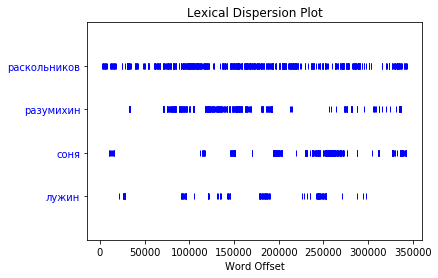

In [39]:
from nltk import Text as nltk_text
prest_i_nak_nltk_format = nltk_text(prest_i_nak_by_mystem)
prest_i_nak_nltk_format.dispersion_plot(["раскольников", "разумихин", "соня", "лужин"])

## График частотности слова

Для этого я не нашел решения сходу (т.е. за 5 минут гугления и прочесывания [книжки по NLTK](https://www.nltk.org/book/). Поэтому решил написать свое. 

In [31]:
# запилим отдельную функцию, которая будет брать на вход слово
## — и длину отрезка в тексте,
# а дальше идти по тексту, считая частотность слова в этом отрезка

def freq_counter (word, segment_length, tokenized_text): ## def названиефункции -- это такой способ задать функцию в питоне
    counter = 0 
    freqs = []
    this_freq = 0
    for some_word in tokenized_text:
        if word.lower() == some_word.lower():
            this_freq +=1
        counter +=1
        if not counter % segment_length:
            freqs.append (this_freq/segment_length) ## нормируем на размер сегмента
            this_freq = 0
    freqs.append (this_freq/ (counter%segment_length)) ## в этой строчке мы учитываем последний сегмент, который 
    ## в for-цикле выше не обрабатывается (т.к. там только на точках, где число кратно длине сегмента, частотность сохраняется)
    ## Размер последнего сегмента меньше, т.к. 
    ## цикл обрывается на посл.слове.  мы 
    ## вычисляем размер последнего короткого сегмента как остаток от 
    ## деления counter (который просто измеряет длину текста) — на segment_length 
    
    return  (freqs)
        

In [32]:
freq_counter ('раскольников', 10000, prest_i_nak_by_mystem)

[0.0012,
 0.0014,
 0.0004,
 0.0022,
 0.0009,
 0.0007,
 0.0024,
 0.0028,
 0.0018,
 0.0041,
 0.0049,
 0.0029,
 0.0009,
 0.0012,
 0.0021,
 0.0036,
 0.0037,
 0.0037,
 0.0021,
 0.0019,
 0.0027,
 0.004,
 0.001,
 0.0013,
 0.0011,
 0.001,
 0.0017,
 0.0031,
 0.0027,
 0.001,
 0.0011,
 0.0004,
 0.0014,
 0.0028,
 0.0019455252918287938]

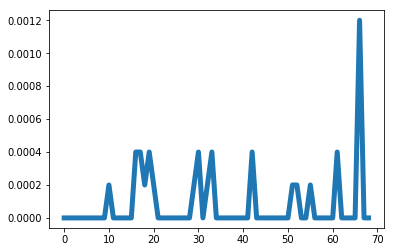

In [33]:
import matplotlib.pyplot as plt
plt.plot (freq_counter ('убийство', 5000, prest_i_nak_by_mystem), linewidth=5);

## Теперь попробуем так: возьмем весь наш корпус, сольем в один файл — и запустим на нем то же самое

В GitHub нельзя запихать файл тяжелее 100 мб. Так что [вот он просто на гугл драйве](https://drive.google.com/open?id=1dEps432C_6jqsIgxPmhPu4keD_9VnM69). 

In [ ]:
## напишем это вместе на паре

## Тематическое моделирование (задание для скучающих, 7.10.2019 - 9.10.2019)

Я умею делать тематическое моделирование только по олдскулу с помощью MALLET.
Поэтому задание для продвинутых: выяснить, как запускать в питоне топик моделинг -- и автоматически визуализировать полученные топики в таком духе: 

![топики](pics/topics.png)

## Задание для скучающих номер 2 (09.10.2019) 

Существуют решения для NER для русского языка, например, парсер [Наташа](https://github.com/natasha/natasha). Давайте реализуем такую штуку: ваш код берет текст, находит в нем все упоминения людей -- а потом строит граф, считая связью факт соседства упоминаний на каком-то расстоянии
В продвинутой версии — еще и визуализирует его, например, [с помощью networkx + matplotlib](https://networkx.github.io/documentation/stable/auto_examples/index.html#drawing)

In [22]:
lemmatized_pres_i_nak = []
for word in prest_i_nak_nltk_tokenized:
    if word not in [',',';','!','?',':','$',' ']:
        rezultat_analiza = morph.parse(word)
        naibolee_veroyantniy_razbor = rezultat_analiza[0] ## почему мы берем первый разбор? 
    ## см.в этом месте: https://pymorphy2.readthedocs.io/en/latest/user/guide.html#select-correct
        lemma = naibolee_veroyantniy_razbor.normal_form
        lemmatized_pres_i_nak.append(lemma)
    else:
        lemmatized_pres_i_nak.append (word)